In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import os
from dotenv import load_dotenv

from marple.connection import DatabaseDatasetConnection, DatabaseConnection
from marple.dataset import Dataset

load_dotenv("../.env")

DB_URL = "https://marple-api.herokuapp.com"
DB_ROLE = os.environ["DB_ROLE"]
JWT_TOKEN = os.environ["JWT_TOKEN"]

dataset_conn = DatabaseDatasetConnection(DB_URL,"dataset", db_role=DB_ROLE, jwt_token=JWT_TOKEN)



In [15]:
periodicity = "quarterly"

ds_share = Dataset(dataset_conn.get_by_id(f"sweden-scb-new_registration_of_cars-{periodicity}-rate-personbilar_laddbara"))
ds_count = Dataset(dataset_conn.get_by_id(f"sweden-scb-new_registration_of_cars-{periodicity}-count-personbilar_laddbara"))
ds_count_total = Dataset(dataset_conn.get_by_id(f"sweden-scb-new_registration_of_cars-{periodicity}-count-personbilar_totalt"))

df = ds_share.to_dataframe("index")
df_count = ds_count.to_dataframe("index")
df_count_total = ds_count_total.to_dataframe("index")
df.timepoint.max()

'2021-01-01'

In [3]:
latest_tp = df.timepoint.max()
df_wide = pd.pivot_table(df,index="region", columns="timepoint", values="value")
time_cols = df_wide.columns

one_year_ago = time_cols[-5]
one_period_ago = time_cols[-2]

df_wide["latest_is_max"] = df_wide.rank(axis=1, ascending=False)[latest_tp] == 1
df_wide["latest_value"] = df_wide[latest_tp]
df_wide["previous_year_value"] = df_wide[one_year_ago]
df_wide["previous_period_value"] = df_wide[one_period_ago]
df_wide["previous_year_diff"] = df_wide["latest_value"] - df_wide["previous_year_value"]
df_wide["previous_period_diff"] = df_wide["latest_value"] - df_wide["previous_period_value"]

df_wide

timepoint            2006-01-01  2006-04-01  2006-07-01  2006-10-01  \
region                                                                
Ale kommun                  0.0         0.0         0.0         0.0   
Alingsås kommun             0.0         0.0         0.0         0.0   
Alvesta kommun              0.0         0.0         0.0         0.0   
Aneby kommun                0.0         0.0         0.0         0.0   
Arboga kommun               0.0         0.0         0.0         0.0   
...                         ...         ...         ...         ...   
Österåkers kommun           0.0         0.0         0.0         0.0   
Östhammars kommun           0.0         0.0         0.0         0.0   
Östra Göinge kommun         0.0         0.0         0.0         0.0   
Överkalix kommun            0.0         0.0         0.0         0.0   
Övertorneå kommun           0.0         0.0         0.0         0.0   

timepoint            2007-01-01  2007-04-01  2007-07-01  2007-10-01  \
region                                                                
Ale kommun                  0.0         0.0         0.0         0.0   
Alingsås kommun             0.0         0.0         0.0         0.0   
Alvesta kommun              0.0         0.0         0.0         0.0   
Aneby kommun                0.0         0.0         0.0         0.0   
Arboga kommun               0.0         0.0         0.0         0.0   
...                         ...         ...         ...         ...   
Österåkers kommun           0.0         0.0         0.0         0.0   
Östhammars kommun           0.0         0.0         0.0         0.0   
Östra Göinge kommun         0.0         0.0         0.0         0.0   
Överkalix kommun            0.0         0.0         0.0         0.0   
Övertorneå kommun           0.0         0.0         0.0         0.0   

timepoint            2008-01-01  2008-04-01  ...  2020-04-01  2020-07-01  \
region                                       ...                           
Ale kommun                  0.0         0.0  ...    0.188034    0.308176   
Alingsås kommun             0.0         0.0  ...    0.168950    0.204748   
Alvesta kommun              0.0         0.0  ...    0.163636    0.265823   
Aneby kommun                0.0         0.0  ...    0.238095    0.222222   
Arboga kommun               0.0         0.0  ...    0.270270    0.222222   
...                         ...         ...  ...         ...         ...   
Österåkers kommun           0.0         0.0  ...    0.273543    0.279898   
Östhammars kommun           0.0         0.0  ...    0.013514    0.125000   
Östra Göinge kommun         0.0         0.0  ...    0.181818    0.214286   
Överkalix kommun            0.0         0.0  ...    0.000000    0.000000   
Övertorneå kommun           0.0         0.0  ...    0.200000    0.166667   

timepoint            2020-10-01  2021-01-01  latest_is_max  latest_value  \
region                                                                     
Ale kommun             0.331210    0.272727          False      0.272727   
Alingsås kommun        0.283721    0.172414          False      0.172414   
Alvesta kommun         0.314607    0.467742           True      0.467742   
Aneby kommun           0.454545    0.365854          False      0.365854   
Arboga kommun          0.396226    0.307692          False      0.307692   
...                         ...         ...            ...           ...   
Österåkers kommun      0.367483    0.344902          False      0.344902   
Östhammars kommun      0.287037    0.233645          False      0.233645   
Östra Göinge kommun    0.224138    0.400000           True      0.400000   
Överkalix kommun       0.333333    0.166667          False      0.166667   
Övertorneå kommun      0.300000    0.285714          False      0.285714   

timepoint            previous_year_value  previous_period_value  \
region                                                            
Ale kommun                      0.235772

In [16]:
df_count_total_latest = df_count_total[df_count_total["timepoint"] == latest_tp].set_index("region")
df_count_total_latest

timepoint measure     car_type    fuel  value status
region                                                                    
Ale kommun           2021-01-01   count  personbilar  totalt    187       
Alingsås kommun      2021-01-01   count  personbilar  totalt    464       
Alvesta kommun       2021-01-01   count  personbilar  totalt    124       
Aneby kommun         2021-01-01   count  personbilar  totalt     41       
Arboga kommun        2021-01-01   count  personbilar  totalt     52       
...                         ...     ...          ...     ...    ...    ...
Österåkers kommun    2021-01-01   count  personbilar  totalt    461       
Östhammars kommun    2021-01-01   count  personbilar  totalt    107       
Östra Göinge kommun  2021-01-01   count  personbilar  totalt     85       
Överkalix kommun     2021-01-01   count  personbilar  totalt      6       
Övertorneå kommun    2021-01-01   count  personbilar  totalt      7       

[312 rows x 6 columns]

In [4]:
print("Hur många slog laddbartrekord?")
df_wide.latest_is_max.value_counts()

Hur många slog laddbartrekord?


False    240
True      72
Name: latest_is_max, dtype: int64

In [38]:
df_wide[df_wide.previous_period_diff > 0.05]

timepoint                2006-01-01  2006-04-01  2006-07-01  2006-10-01  \
region                                                                    
Alvesta kommun                  0.0         0.0         0.0         0.0   
Arjeplogs kommun                0.0         0.0         0.0         0.0   
Arvika kommun                   0.0         0.0         0.0         0.0   
Bengtsfors kommun               0.0         0.0         0.0         0.0   
Bjurholms kommun                0.0         0.0         0.0         0.0   
Borgholms kommun                0.0         0.0         0.0         0.0   
Degerfors kommun                0.0         0.0         0.0         0.0   
Dorotea kommun                  0.0         0.0         0.0         0.0   
Essunga kommun                  0.0         0.0         0.0         0.0   
Flens kommun                    0.0         0.0         0.0         0.0   
Hallsbergs kommun               0.0         0.0         0.0         0.0   
Hammarö kommun                  0.0         0.0         0.0         0.0   
Haparanda kommun                0.0         0.0         0.0         0.0   
Hedemora kommun                 0.0         0.0         0.0         0.0   
Hällefors kommun                0.0         0.0         0.0         0.0   
Hörby kommun                    0.0         0.0         0.0         0.0   
Laxå kommun                     0.0         0.0         0.0         0.0   
Lekebergs kommun                0.0         0.0         0.0         0.0   
Lycksele kommun                 0.0         0.0         0.0         0.0   
Mariestads kommun               0.0         0.0         0.0         0.0   
Munkfors kommun                 0.0         0.0         0.0         0.0   
Mönsterås kommun                0.0         0.0         0.0         0.0   
Nordmalings kommun              0.0         0.0         0.0         0.0   
Norsjö kommun                   0.0         0.0         0.0         0.0   
Nykvarns kommun                 0.0         0.0         0.0         0.0   
Olofströms kommun               0.0         0.0         0.0         0.0   
Piteå kommun                    0.0         0.0         0.0         0.0   
Ragunda kommun                  0.0         0.0         0.0         0.0   
Ronneby kommun                  0.0         0.0         0.0         0.0   
Salems kommun                   0.0         0.0         0.0         0.0   
Skinnskattebergs kommun         0.0         0.0         0.0         0.0   
Sollentuna kommun               0.0         0.0         0.0         0.0   
Storfors kommun                 0.0         0.0         0.0         0.0   
Svalövs kommun                  0.0         0.0         0.0         0.0   
Tidaholms kommun                0.0         0.0         0.0         0.0   
Uppvidinge kommun               0.0         0.0         0.0         0.0   
Ydre kommun                     0.0         0.0         0.0         0.0   
Älvkarleby kommun               0.0         0.0         0.0         0.0   
Ånge kommun                     0.0         0.0         0.0         0.0   
Åsele kommun                    0.0         0.0         0.0         0.0   
Åtvidabergs kommun              0.0         0.0         0.0         0.0   
Östra Göinge kommun             0.0         0.0         0.0         0.0   

timepoint                2007-01-01  2007-04-01  2007-07-01  2007-10-01  \
region                                                                    
Alvesta kommun                  0.0         0.0         0.0         0.0   
Arjeplogs kommun                0.0         0.0         0.0         0.0   
Arvika kommun                   0.0         0.0         0.0         0.0   
Bengtsfors kommun               0.0         0.0         0.0         0.0   
Bjurholms kommun                0.0         0.0         0.0         0.0   
Borgholms kommun                0.0         0.0         0.0         0.0   
Degerfors kommun                0.0         0.0         0.0         0.0   
Dorotea kommun          

In [39]:
df_wide[df_wide.latest_is_max]

timepoint            2006-01-01  2006-04-01  2006-07-01  2006-10-01  \
region                                                                
Alvesta kommun              0.0         0.0         0.0         0.0   
Arjeplogs kommun            0.0         0.0         0.0         0.0   
Arvika kommun               0.0         0.0         0.0         0.0   
Bergs kommun                0.0         0.0         0.0         0.0   
Blekinge län                0.0         0.0         0.0         0.0   
...                         ...         ...         ...         ...   
Ystads kommun               0.0         0.0         0.0         0.0   
Älvkarleby kommun           0.0         0.0         0.0         0.0   
Åre kommun                  0.0         0.0         0.0         0.0   
Åtvidabergs kommun          0.0         0.0         0.0         0.0   
Östra Göinge kommun         0.0         0.0         0.0         0.0   

timepoint            2007-01-01  2007-04-01  2007-07-01  2007-10-01  \
region                                                                
Alvesta kommun              0.0         0.0         0.0         0.0   
Arjeplogs kommun            0.0         0.0         0.0         0.0   
Arvika kommun               0.0         0.0         0.0         0.0   
Bergs kommun                0.0         0.0         0.0         0.0   
Blekinge län                0.0         0.0         0.0         0.0   
...                         ...         ...         ...         ...   
Ystads kommun               0.0         0.0         0.0         0.0   
Älvkarleby kommun           0.0         0.0         0.0         0.0   
Åre kommun                  0.0         0.0         0.0         0.0   
Åtvidabergs kommun          0.0         0.0         0.0         0.0   
Östra Göinge kommun         0.0         0.0         0.0         0.0   

timepoint            2008-01-01  2008-04-01  ...  2020-04-01  2020-07-01  \
region                                       ...                           
Alvesta kommun              0.0         0.0  ...    0.163636    0.265823   
Arjeplogs kommun            0.0         0.0  ...    0.000000    0.111111   
Arvika kommun               0.0         0.0  ...    0.100000    0.225564   
Bergs kommun                0.0         0.0  ...    0.200000    0.133333   
Blekinge län                0.0         0.0  ...    0.147488    0.227950   
...                         ...         ...  ...         ...         ...   
Ystads kommun               0.0         0.0  ...    0.120773    0.224913   
Älvkarleby kommun           0.0         0.0  ...    0.058824    0.130435   
Åre kommun                  0.0         0.0  ...    0.120000    0.285714   
Åtvidabergs kommun          0.0         0.0  ...    0.103448    0.275000   
Östra Göinge kommun         0.0         0.0  ...    0.181818    0.214286   

timepoint            2020-10-01  2021-01-01  latest_is_max  latest_value  \
region                                                                     
Alvesta kommun         0.314607    0.467742           True      0.467742   
Arjeplogs kommun       0.000000    0.500000           True      0.500000   
Arvika kommun          0.234694    0.289308           True      0.289308   
Bergs kommun           0.523810    0.533333           True      0.533333   
Blekinge län           0.248283    0.264624           True      0.264624   
...                         ...         ...            ...           ...   
Ystads kommun          0.280303    0.310127           True      0.310127   
Älvkarleby kommun      0.280000    0.363636           True      0.363636   
Åre kommun             0.345455    0.372093           True      0.372093   
Åtvidabergs kommun     0.309091    0.385965           True      0.385965   
Östra Göinge kommun    0.224138    0.400000           True      0.400000   

timepoint            previous_year_value  previous_period_value  \
region                                                            
Alvesta kommun                  0.289855

/home/jens/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='timepoint'>

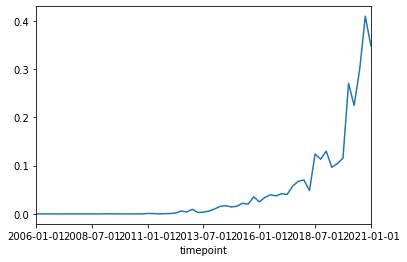

In [27]:
df_wide.loc["Sweden"][time_cols].plot()

In [21]:
MIN_SALES_THRESHOLD = 100
n_over_threshold = (df_count_total_latest["value"] >= MIN_SALES_THRESHOLD).sum()
print(f"Antal regioner med minst {MIN_SALES_THRESHOLD} försäljningar: {n_over_threshold} ")

Antal regioner med minst 100 försäljningar: 160 
